In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [3]:
print ("The training data set is:\n")
print (mnist.train.images.shape)
print (mnist.train.labels.shape)

The training data set is:

(55000, 784)
(55000, 10)


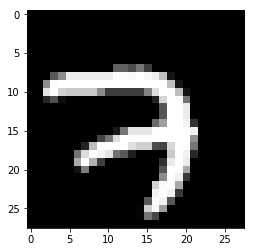

In [6]:
plt.imshow(mnist.train.images[0].reshape(-1,28),'gray')
plt.show()

In [7]:
n_input = 28*28
n_hidden = 100
n_output = 10

In [8]:
weights={'hidden':tf.Variable(tf.random_normal([n_input,n_hidden],stddev=0.1)),
'output':tf.Variable(tf.random_normal([n_hidden,n_output],stddev=0.1))}
bias={'hidden':tf.Variable(tf.random_normal([n_hidden],stddev=0.1)),'output':tf.Variable(tf.random_normal([n_output],stddev=0.1))}


In [19]:
def build_model(x,weights,bias):
    hidden=tf.add(tf.matmul(x,weights['hidden']),bias['hidden'])
    hidden=tf.nn.relu(hidden)
    
    output=tf.add(tf.matmul(hidden,weights['output']),bias['output'])
    
    return output


In [20]:
x=tf.placeholder(tf.float32,[None,n_input])
y=tf.placeholder(tf.float32,[None,n_output])

In [21]:
pred=build_model(x,weights,bias)
loss=tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y)
loss=tf.reduce_mean(loss)

opt=tf.train.AdamOptimizer(0.0001).minimize(loss)

init=tf.global_variables_initializer()
sess=tf.Session()

sess.run(init)

for i in range(10000):
    idx=np.random.choice(mnist.train.images.shape[0],50)

    train_x,train_y=mnist.train.next_batch(50)
    _,l=sess.run([opt,loss],feed_dict={x:train_x,y:train_y})
    print(l)

2.4234445
2.4323535
2.2986686
2.325032
2.3594732
2.559371
2.4955633
2.2240741
2.3981757
2.1415932
2.34163
2.2144516
2.2529566
2.1891308
2.3037572
2.1658506
2.3724616
2.233875
2.2334793
2.153066
2.2348502
2.1224399
2.3190434
2.1000762
2.2840347
2.2664292
2.2409227
2.1882854
2.2002463
2.1543417
2.1163712
2.0841646
2.0640528
2.056569
2.1196907
2.0900912
2.1867936
2.1023746
2.1759818
2.117338
2.0221353
1.993422
2.1110353
2.0993776
2.009935
2.0389104
2.0259435
1.8826194
1.9788141
2.0138404
1.9831226
2.0084155
1.9301611
1.8798388
1.9067938
2.0219588
1.9383136
2.1219878
1.9429349
2.0096624
1.9581184
1.8348557
1.9387082
1.9228184
1.8910229
1.8821785
1.892052
1.95893
1.8445237
1.9060736
2.0154328
1.8432708
1.9057907
1.8224907
1.8264434
2.0052283
1.9430118
1.8480624
1.7713052
1.672936
1.8583792
1.8622904
1.806366
1.8693762
1.8262041
1.7165275
1.7878776
1.9879944
1.725871
1.8974761
1.7752475
1.6748527
1.7534715
1.85511
1.6584247
1.8598601
1.6774621
1.551991
1.6698917
1.6848985
1.8141171
1.7473837

0.49944445
0.44517255
0.58252245
0.47265244
0.4450882
0.6029834
0.5259741
0.53403413
0.5325322
0.5076658
0.52773863
0.5479126
0.6516309
0.403898
0.48012024
0.38863522
0.557526
0.40542373
0.47099435
0.6242119
0.6471751
0.53887486
0.47774047
0.542627
0.46954116
0.6022775
0.91812575
0.66210175
0.4583171
0.5699435
0.45708284
0.40635931
0.47613555
0.74861735
0.45838678
0.3796873
0.48849067
0.4497132
0.5083589
0.30747414
0.34683496
0.50164145
0.47894618
0.57115114
0.41927633
0.5438418
0.47044724
0.29471928
0.40683764
0.41036472
0.5060176
0.36453032
0.40434688
0.44160134
0.5061187
0.58476657
0.44622794
0.5291452
0.48091918
0.41516906
0.54450494
0.47545326
0.50774497
0.41800433
0.53092974
0.3969285
0.6580637
0.5799793
0.4542969
0.40392312
0.42926034
0.5813375
0.5076568
0.38089806
0.34266648
0.527789
0.7533355
0.5728241
0.460729
0.29641435
0.48648956
0.55033374
0.6072466
0.5382899
0.5200016
0.37701693
0.47054484
0.34308037
0.64351946
0.3786154
0.37242118
0.47036076
0.47103518
0.6995598
0.614763

0.38801113
0.55064046
0.4000086
0.35078877
0.35218078
0.42988646
0.23900937
0.28199258
0.36490098
0.37634605
0.30343705
0.2608028
0.4979358
0.3645706
0.3902321
0.33226418
0.5621371
0.34374595
0.28240806
0.4443594
0.35875377
0.27227348
0.1832975
0.2038638
0.2573244
0.36584148
0.40715972
0.30497253
0.3880479
0.2650633
0.31943414
0.38998753
0.3890542
0.31074575
0.28821805
0.42758796
0.49189526
0.3915197
0.3104311
0.21106654
0.41904786
0.35925633
0.31671932
0.28045818
0.29797593
0.2537759
0.32840997
0.4053519
0.3450926
0.42791298
0.33128098
0.4783487
0.33635634
0.41787487
0.4653508
0.35848522
0.26866487
0.2902701
0.38089374
0.33385193
0.70100176
0.5955077
0.4152309
0.17350483
0.33720094
0.2977989
0.3513507
0.2643585
0.5192275
0.63209844
0.40204507
0.420947
0.27086788
0.2689198
0.17457657
0.17083699
0.3542652
0.25052252
0.23526196
0.2649091
0.3164128
0.46734467
0.4919853
0.37746793
0.69949824
0.31044942
0.30786803
0.4095147
0.54344696
0.5977118
0.5479722
0.51244843
0.28586304
0.3330629
0.64

0.22861305
0.37398994
0.34611046
0.29001158
0.28204358
0.3533336
0.4420207
0.19559015
0.2153358
0.3858477
0.2792565
0.27934232
0.3327487
0.4887812
0.15037252
0.36335358
0.20478147
0.25499287
0.52905345
0.27381027
0.1988718
0.49383146
0.23581989
0.45314002
0.3286257
0.2925302
0.20513001
0.4421124
0.42611685
0.33886158
0.5070443
0.42016435
0.16544615
0.525314
0.48267913
0.23274136
0.47801942
0.23588829
0.20780256
0.2197408
0.22580193
0.29061586
0.34974915
0.24845852
0.2553616
0.27600014
0.22081795
0.27570465
0.33504027
0.23343186
0.20621806
0.59849644
0.34607095
0.43331042
0.2397483
0.55923414
0.2624946
0.8261679
0.2541218
0.4221364
0.18557458
0.28900096
0.3647675
0.5207977
0.42403674
0.39976785
0.3598461
0.32049733
0.19770557
0.27107018
0.42000988
0.27091658
0.22979023
0.270318
0.24913245
0.2830696
0.34206706
0.42068848
0.3193915
0.2009644
0.36881962
0.18613918
0.28638205
0.20127821
0.49948433
0.14345127
0.27355754
0.25013375
0.26843736
0.28323928
0.15673074
0.47460234
0.16910723
0.2158

0.32221353
0.3475466
0.3143656
0.2774879
0.21377842
0.49721184
0.3654252
0.44322506
0.12851438
0.26654002
0.32391572
0.3168813
0.20303383
0.25810453
0.41970003
0.37118894
0.18807065
0.20129144
0.2191028
0.4530448
0.16962704
0.3900686
0.12921253
0.22961855
0.44402245
0.22409521
0.3520592
0.17229638
0.19429997
0.21231501
0.27288392
0.373157
0.33551186
0.2020744
0.31412607
0.1582588
0.2577528
0.17133823
0.23276505
0.26233888
0.15169235
0.2702697
0.22652496
0.1975359
0.39896408
0.25629184
0.124573976
0.20497191
0.30363098
0.21010168
0.26038364
0.17365749
0.3235385
0.29492068
0.32103184
0.24196808
0.37907806
0.20086536
0.27755916
0.2176086
0.13536823
0.24880353
0.17006958
0.28108892
0.26134026
0.25276655
0.4574932
0.5098624
0.2757482
0.3227417
0.3387685
0.21679217
0.3505464
0.20281266
0.19949993
0.30338147
0.17470957
0.28610596
0.16097401
0.3711989
0.16771106
0.19414127
0.22597966
0.17868258
0.1313862
0.4287104
0.3280742
0.12537324
0.52366793
0.21135017
0.15377162
0.3680156
0.19893438
0.386

0.24486119
0.20375533
0.17999132
0.23762336
0.13528886
0.25753462
0.23105194
0.31895742
0.32302883
0.1707244
0.28010982
0.21240486
0.12609266
0.26829043
0.18464513
0.32315886
0.28588748
0.13756548
0.22199169
0.2926249
0.16350178
0.15647192
0.59512615
0.098777354
0.19281635
0.4258216
0.16455853
0.3094799
0.18228829
0.33761448
0.28038746
0.47318006
0.35845807
0.17727579
0.27697513
0.184003
0.17490277
0.21158999
0.24226207
0.21190196
0.21832494
0.1948172
0.26129693
0.40723035
0.31627
0.18543787
0.23159763
0.24357027
0.29030177
0.23899975
0.22737992
0.3072679
0.21025704
0.10623015
0.16992651
0.2383382
0.15062644
0.19809026
0.25295547
0.22789538
0.24729921
0.63139063
0.119880676
0.17491648
0.52953005
0.31326568
0.23311388
0.32451224
0.37010136
0.31439438
0.3764795
0.2361014
0.1800969
0.10866289
0.3800759
0.32848808
0.20396723
0.25387043
0.1488668
0.38638642
0.23098277
0.35185376
0.11616956
0.29508588
0.12935573
0.22352146
0.17599174
0.30231285
0.31755164
0.2641069
0.3241897
0.17394462
0.168

0.16002235
0.22638632
0.2146836
0.36097568
0.27621368
0.2221589
0.12560232
0.41603908
0.2626249
0.30711308
0.16239105
0.11042429
0.4336903
0.20977947
0.14441505
0.19077599
0.22792399
0.17815515
0.23203756
0.115564786
0.2861082
0.15628883
0.30027753
0.21993664
0.23410764
0.15895252
0.09803998
0.100420855
0.08914056
0.18754211
0.20445022
0.29102528
0.2937317
0.27917394
0.25706282
0.23855487
0.13176066
0.12823683
0.24235767
0.14164743
0.25443777
0.13124438
0.1884729
0.16038582
0.4587465
0.25197357
0.16375741
0.13680248
0.25893295
0.20034349
0.12008843
0.18082215
0.36688188
0.17775245
0.22617394
0.19152443
0.34922254
0.20387875
0.15414795
0.325808
0.24320614
0.59813905
0.17694217
0.17028493
0.082213745
0.17196846
0.45184612
0.16914046
0.13114882
0.1269529
0.27873254
0.2697331
0.2535573
0.22858554
0.24441765
0.3725875
0.14855944
0.30808717
0.24009411
0.12865897
0.2474913
0.43952423
0.16124149
0.13915993
0.10333909
0.1860457
0.39201003
0.35717586
0.39658496
0.24663305
0.30116588
0.20267364
0

0.12824364
0.14684963
0.089096
0.29776046
0.22050339
0.15976672
0.14796263
0.20821783
0.24616738
0.20365086
0.25982475
0.17812394
0.09691987
0.16895239
0.20968181
0.20133965
0.27379668
0.34178853
0.17751068
0.2385204
0.16561215
0.2256977
0.34943408
0.19228767
0.12110435
0.14716095
0.14571606
0.18666527
0.17943035
0.26755226
0.2500604
0.123401925
0.22451526
0.1360843
0.2588174
0.14139609
0.33123612
0.35596088
0.13714318
0.19338161
0.10095007
0.19237731
0.24508782
0.2615202
0.27033448
0.083880775
0.24269825
0.313324
0.07164354
0.14497215
0.23665082
0.1524756
0.081654966
0.32310975
0.21134445
0.18745047
0.29034737
0.1594081
0.2150267
0.31544945
0.17644072
0.27027065
0.20710054
0.20043053
0.30454084
0.18377699
0.14639853
0.17138404
0.14808485
0.34244698
0.17024833
0.15034069
0.20148212
0.16918957
0.32165173
0.27069035
0.13256913
0.12947404
0.08244243
0.29873225
0.24839927
0.36264366
0.08341629
0.18286854
0.47233337
0.30386215
0.1633413
0.07251835
0.09155213
0.17303285
0.19032417
0.18183628

0.22398403
0.26743066
0.073153734
0.11347893
0.19499514
0.1969229
0.24850138
0.15157713
0.11684162
0.048436716
0.20992073
0.08527094
0.107305355
0.3517418
0.3098227
0.16069178
0.20789982
0.1292245
0.28354907
0.42963466
0.09526828
0.09675787
0.4896521
0.11445988
0.3479601
0.09368342
0.15273426
0.33564967
0.123515055
0.15793322
0.19708069
0.28831998
0.28867206
0.1141718
0.44646722
0.12156568
0.11419391
0.2448052
0.3905347
0.43969154
0.1677701
0.22464351
0.26241273
0.059402637
0.21591629
0.09828478
0.2776648
0.11655964
0.3530431
0.33022195
0.2649993
0.14624952
0.06794801
0.1119577
0.09168452
0.18953386
0.14860809
0.15426958
0.2202626
0.14454928
0.18686466
0.36645097
0.11285101
0.44972935
0.24942043
0.08747428
0.20676748
0.24509403
0.10798874
0.1289261
0.15060715
0.14627932
0.23844372
0.12791862
0.1644048
0.27768663
0.087210506
0.18111962
0.15302987
0.22827843
0.112509355
0.35760018
0.19942218
0.15433194
0.06541328
0.17117363
0.2111878
0.103381306
0.20663907
0.15534168
0.12756172
0.1358366

0.23514141
0.06812335
0.3344648
0.18501396
0.105134465
0.20689304
0.20229332
0.23303787
0.1553921
0.31754953
0.14783002
0.12161266
0.0868642
0.14705667
0.06602246
0.19601421
0.2662934
0.10481076
0.105730474
0.27645546
0.2525786
0.13160326
0.13065602
0.11638711
0.056613244
0.15967196
0.16460036
0.20782557
0.28721315
0.068201564
0.19641258
0.39361534
0.25046748
0.24265876
0.14291698
0.11583493
0.16550966
0.06087411
0.1716851
0.102192745
0.21317664
0.19293314
0.1636053
0.06632211
0.27194655
0.13043943
0.2941793
0.15492621
0.18352203
0.20466591
0.1498334
0.4383746
0.24203302
0.38660377
0.16775694
0.17621034
0.12470621
0.13147663
0.26478252
0.16184439
0.14609468
0.31016156
0.31625786
0.21686643
0.10276349
0.30821475
0.19327232
0.13786462
0.21378116
0.12630148
0.19110087
0.40817738
0.36773717
0.30783215
0.23983821
0.12864901
0.35016426
0.2246463
0.29107922
0.21276097
0.18807888
0.24314786
0.11236141
0.06372839
0.23753527
0.12098551
0.27747762
0.16479716
0.29424623
0.38609946
0.16483615
0.105

0.12675509
0.13467766
0.25123593
0.18884644
0.23136206
0.12721486
0.2918186
0.26064262
0.21214874
0.1911264
0.28829023
0.21118298
0.38169038
0.2459039
0.10133591
0.14560176
0.18850403
0.22116879
0.3429699
0.11503456
0.28928587
0.20811075
0.2635941
0.12285482
0.12626314
0.11977455
0.15131731
0.33189023
0.11065047
0.07353889
0.20455801
0.18646088
0.124641344
0.19651332
0.0755476
0.061223194
0.13717407
0.10508332
0.16797481
0.17395087
0.21796215
0.2619455
0.3554418
0.2448836
0.25584105
0.11550004
0.24523415
0.13271317
0.13674234
0.20580643
0.4495044
0.24941792
0.23650292
0.22307628
0.076945044
0.17292827
0.09317899
0.12235251
0.41100493
0.172766
0.4947429
0.18705589
0.09751004
0.20449764
0.21026324
0.18884441
0.21670628
0.20757046
0.20904861
0.15698853
0.14335294
0.20399688
0.21268544
0.34518564
0.15357065
0.24158898
0.11287596
0.25565317
0.10247371
0.18567857
0.27774984
0.13488346
0.102740265
0.099399254
0.17349742
0.117241345
0.15233359
0.31215656
0.1329597
0.075623326
0.25591522
0.2545

0.063387096
0.12670006
0.09290924
0.09660176
0.17445698
0.15562917
0.15095173
0.18564607
0.20867354
0.117522344
0.1286133
0.21414204
0.13182083
0.14405835
0.1966787
0.3185413
0.108437225
0.07052197
0.12305233
0.07074395
0.2268004
0.17062207
0.10723025
0.094727576
0.0916413
0.22065741
0.14048032
0.35212192
0.15200168
0.26949897
0.19762781
0.17513698
0.20707104
0.18586336
0.1509791
0.24223623
0.06724724
0.12723792
0.15601392
0.0718704
0.08796719
0.1295022
0.12397275
0.1448218
0.24161679
0.0665139
0.17234927
0.115217134
0.14373305
0.10900556
0.1698299
0.22415899
0.19157171
0.11049673
0.14313245
0.06273727
0.09997714
0.23659033
0.09845134
0.11607651
0.16122006
0.1411149
0.17804526
0.17985183
0.12776026
0.12046772
0.14873123
0.30558667
0.21629135
0.18569906
0.17846413
0.12600376
0.24503252
0.07562115
0.10219074
0.1390765
0.16722707
0.08697298
0.13737148
0.21418926
0.10115259
0.37503907
0.33227324
0.08077326
0.15886714
0.24136052
0.3481344
0.059583675
0.37039617
0.10463619
0.28766972
0.20594

0.07230022
0.122048266
0.073886536
0.12902051
0.10892122
0.14265461
0.078652784
0.18076912
0.17183162
0.26967153
0.13452946
0.16842808
0.20743369
0.11767506
0.052969843
0.2946099
0.06375613
0.25247154
0.23729701
0.15803139
0.08915959
0.149819
0.25490963
0.108980015
0.1076235
0.10918235
0.19226141
0.14709398
0.18554632
0.11753777
0.11677571
0.17995165
0.1263343
0.0767905
0.09832624
0.12739079
0.20606323
0.19787006
0.13825656
0.09681183
0.104703486
0.20124027
0.17802513
0.16789566
0.23175946
0.13957642
0.23981515
0.2549191
0.19805947
0.106024325
0.13806099
0.056421548
0.14567922
0.13676779
0.28769106
0.37372887
0.23128527
0.20062564
0.3138625
0.072996266
0.23083828
0.11712924
0.04033978
0.27748397
0.10889269
0.051128875
0.23103276
0.14548412
0.13301861
0.31777352
0.0875819
0.061027277
0.1116185
0.12993287
0.26612112
0.12282198
0.1550807
0.08822105
0.060513888
0.109310836
0.1324033
0.17480694
0.19360013
0.27748483
0.24358945
0.21740013
0.13432686
0.124605104
0.09576724
0.14172946
0.092286

In [25]:
test_x, test_y = mnist.test.next_batch(100)

my_pred = sess.run(pred, feed_dict = {x : test_x})
my_pred=np.argmax(my_pred,axis=1)
labels=np.argmax(test_y,axis=1)


acc=np.mean(np.equal(labels,my_pred))
print(acc)

0.94


In [31]:
test_x, test_y = mnist.test.next_batch(1)
logit=sess.run(tf.nn.softmax(pred),feed_dict={x:test_x})

print(logit)
output=np.argmax(logit)
print(output)
print(np.argmax(test_y))

[[1.6236011e-06 2.9113714e-06 1.4790772e-03 6.7524197e-05 5.8943784e-04
  2.5116460e-04 9.8515360e-04 1.4605916e-07 9.9656218e-01 6.0877268e-05]]
8
8
